In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score,precision_score,recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier  

In [2]:
df_train=pd.read_csv("fraudTrain.csv")
df_test=pd.read_csv('fraudTest.csv')

# EDA

In [3]:
df_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
df_train = df_train.drop(columns=['Unnamed: 0'])

In [5]:
df_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [6]:
df_test = df_test.drop(columns=['Unnamed: 0'])

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [8]:
#checking for Null values
print(f'Null value \n: {df_train.isnull().sum()}')

Null value 
: trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [9]:
print(f'Dublicates: {df_train.duplicated().sum()}')

Dublicates: 0


In [10]:
df_train['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

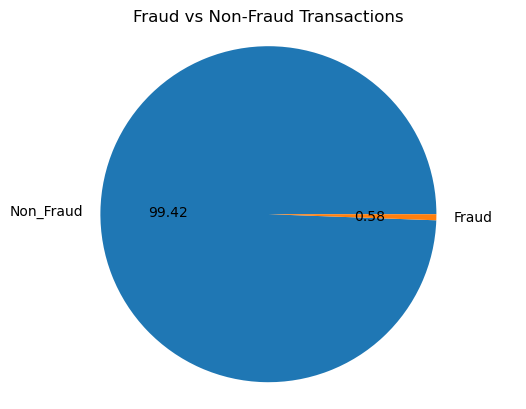

In [11]:
plt.title('Fraud vs Non-Fraud Transactions')

plt.pie(df_train['is_fraud'].value_counts(),labels=['Non_Fraud',"Fraud"],autopct='%.2f')
plt.axis('equal')
plt.show()

In [12]:
df_train.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


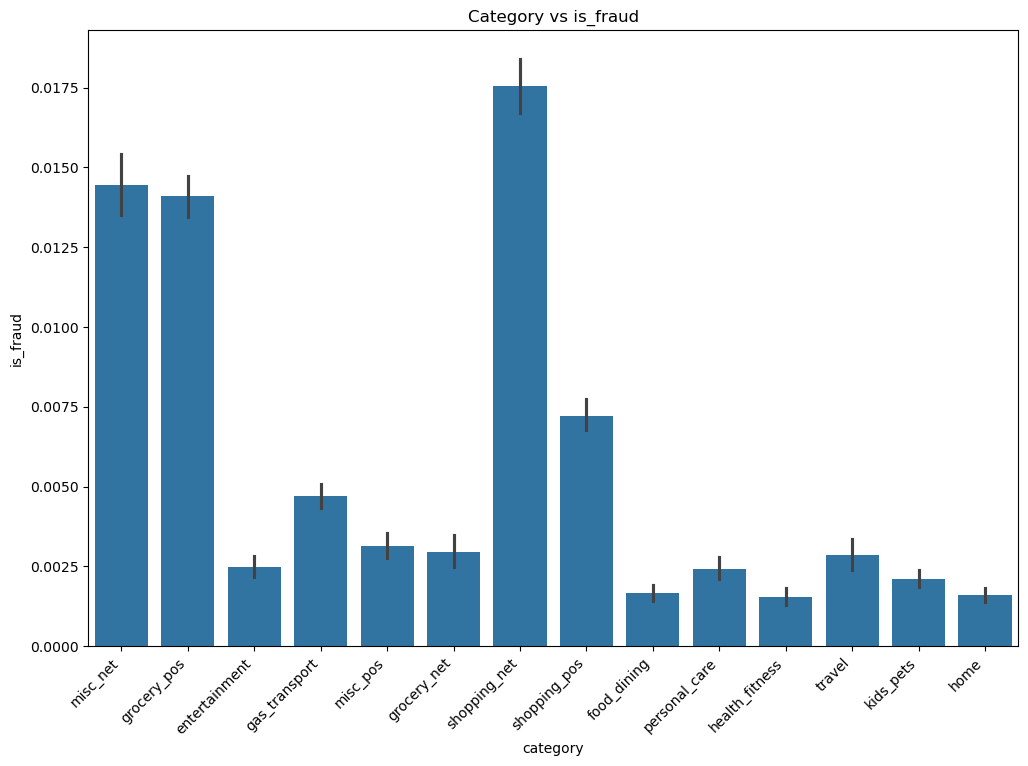

In [13]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45, ha='right')
sns.barplot(x='category',y='is_fraud',data=df_train)
plt.title("Category vs is_fraud")
plt.show()

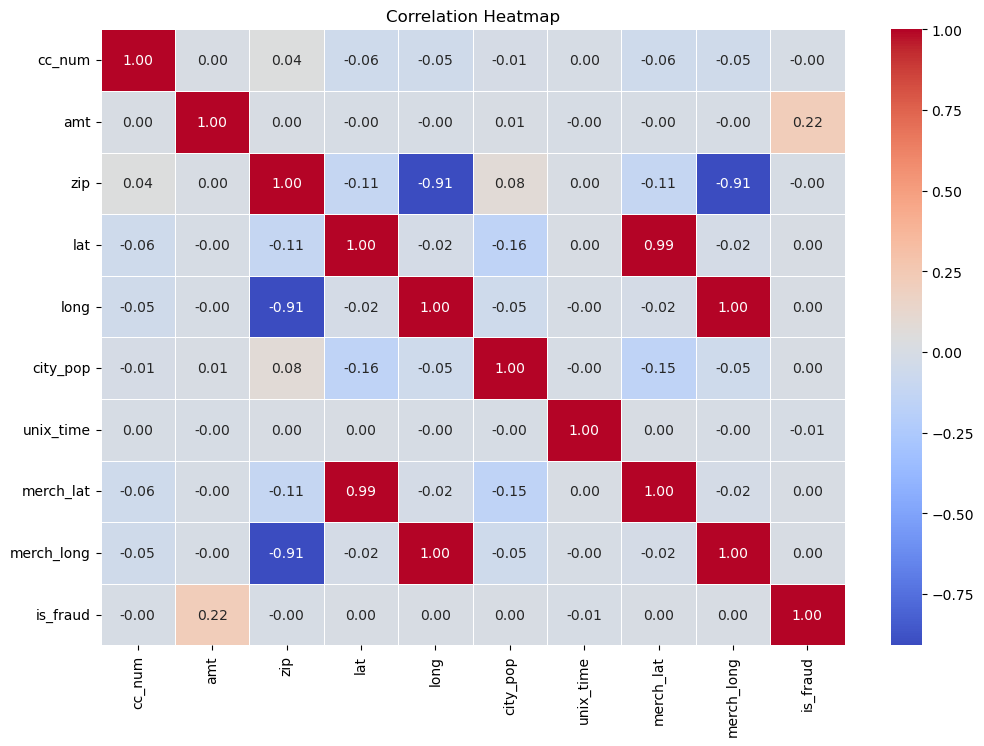

In [14]:
plt.figure(figsize=(12,8))
correlation_matrix=df_train.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

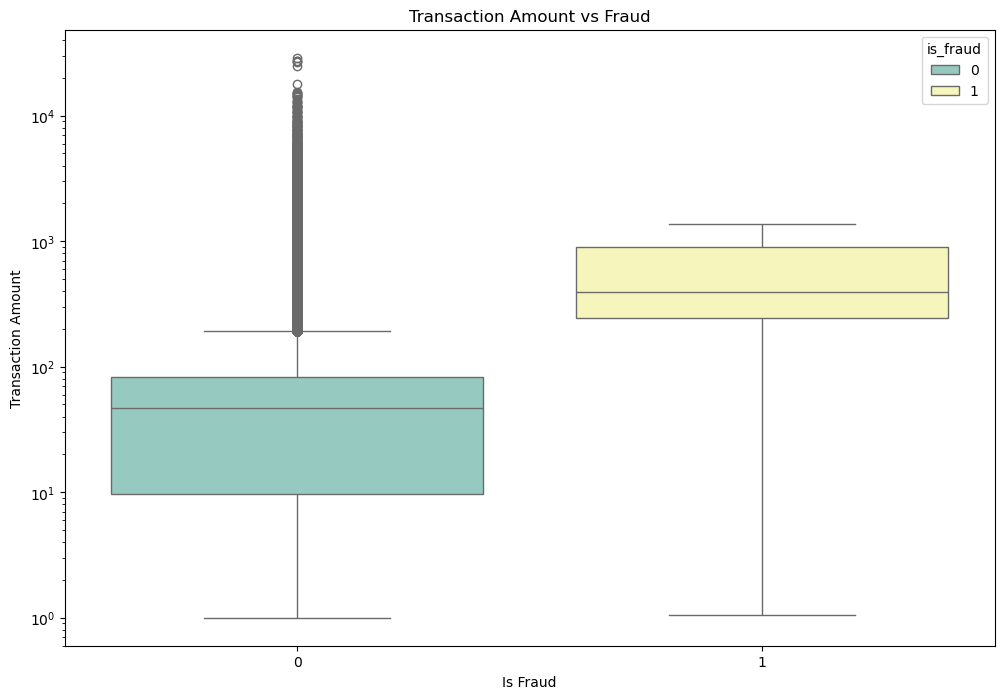

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_fraud', y='amt', data=df_train, hue='is_fraud',palette='Set3')
plt.title('Transaction Amount vs Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.yscale('log') 
plt.show()


In [17]:


def encode(df):
    encoder = LabelEncoder()
    df.loc[:, 'job'] = encoder.fit_transform(df['job'])
    df.loc[:, 'category'] = encoder.fit_transform(df['category'])
    # df.loc[:, 'merchant'] = encoder.fit_transform(df['merchant'])
    df.loc[:, 'gender'] = encoder.fit_transform(df['gender'])
    return df

training_set=df_train[['category','amt','gender','zip','lat','long','job','unix_time','merch_lat','merch_long','is_fraud']]
testing_set=df_test[['category','amt','gender','zip','lat','long','job','unix_time','merch_lat','merch_long','is_fraud']]
encode(training_set)
encode(testing_set)


,category,amt,gender,zip,lat,long,job,unix_time,merch_lat,merch_long,is_fraud
0,10,2.86,1,29209,33.9659,-80.9355,275,1371816865,33.986391,-81.200714,0
1,10,29.84,0,84002,40.3207,-110.4360,392,1371816873,39.450498,-109.960431,0
2,5,41.28,0,11710,40.6729,-73.5365,259,1371816893,40.495810,-74.196111,0
3,9,60.05,1,32780,28.5697,-80.8191,407,1371816915,28.812398,-80.883061,0
4,13,3.19,1,49632,44.2529,-85.0170,196,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...
555714,5,43.77,1,63453,40.4931,-91.8912,460,1388534347,39.946837,-91.333331,0
555715,7,111.84,1,77566,29.0393,-95.4401,198,1388534349,29.661049,-96.186633,0
555716,7,86.88,0,99323,46.1966,-118.9017,294,1388534355,46.658340,-119.715054,0
555717,13,7.99,1,83643,44.6255,-116.4493,58,1388534364,44.470525,-117.080888,0


In [18]:
y_train=training_set['is_fraud']
X_train=training_set.drop(columns='is_fraud')



In [19]:
y_test=testing_set['is_fraud']
X_test=testing_set.drop(columns='is_fraud')


In [20]:
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test=sc.transform(X_test)



# Model Training

In [21]:
rf = RandomForestClassifier(n_estimators=30, max_depth=30, max_samples=0.2, class_weight='balanced',bootstrap=True, random_state=42)

In [22]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30, max_samples=0.2,
                       n_estimators=30, random_state=42)

In [23]:
y_predict = (rf.predict_proba(X_test)[:, 1] >= 0.2).astype(int)
y_pred_prob = rf.predict_proba(X_test) 

accuracy = accuracy_score(y_test, y_predict)
precision=precision_score(y_test, y_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("precision_score:", precision)
print("Recall:", recall_score(y_test, y_predict))
print("F1 Score:", f1_score(y_test, y_predict))


Accuracy: 0.9973079919887569
ROC AUC Score: 0.9306981567028101
precision_score: 0.6844798180784537
Recall: 0.5613053613053613
F1 Score: 0.6168032786885246
